<a href="https://colab.research.google.com/github/mystlee/2024_CSU_AI/blob/main/chater5/tf_MNIST_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>TensorFlow (TF)를 이용한 MNIST 예시<h1>

python 코드에서 관련 모듈 import

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

<h2>MNIST data 로드<h2>

online에서 MNIST를 자동으로 다운로드하고, 학습/평가 데이터로 로드
0에서 255 사이의 값으로 0에서 1 사이의 값으로 변형

그 다음, to_categorical을 이용해서 one-hot vector로 변형

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<h2>모델 구현<h2>

첫번째 layer: weight와 bias만으로 간단하게 구성된 dense layer (=fully connected layer) + LeakyReLU + batchnorm

두번째 layer: dense layer (=fully connected layer) + ReLU + layernorm

세번째 layer: dense layer (=fully connected layer) + PReLU + batchnorm + softmax

(softmax는 분류를 위한 activation function)

In [3]:
model = models.Sequential()

model.add(layers.Dense(256, input_shape=(784,)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128))
model.add(layers.ReLU())
model.add(layers.LayerNormalization())

model.add(layers.Dense(64))
model.add(layers.PReLU())
model.add(layers.BatchNormalization())

model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


<h2>모델 설정<h3>

 optimizer 설정: adam optimizer

 loss function 설정: categorical cross-entropy

 metric 설정: 정확도

In [4]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

<h3>모델 학습<h3>

epochs: 10으로 설정

mini-batch size: 128로 설정

validation data: test 데이터 활용

In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8763 - loss: 0.4110 - val_accuracy: 0.9609 - val_loss: 0.1249
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9749 - loss: 0.0824 - val_accuracy: 0.9693 - val_loss: 0.1008
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9817 - loss: 0.0580 - val_accuracy: 0.9728 - val_loss: 0.0836
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9864 - loss: 0.0410 - val_accuracy: 0.9732 - val_loss: 0.0868
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9893 - loss: 0.0340 - val_accuracy: 0.9770 - val_loss: 0.0788
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9751 - val_loss: 0.0839
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9924 - loss: 0.0245 - val_accuracy: 0.9785 - val_loss: 0.0765
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accur

<h3>학습된 모델을 이용한 성능 평가<h3>

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0866
Test accuracy: 0.9789


<h3>학습된 모델을 이용한 시각화 표현<h3>

python 라이브러리 중에서 matplotlib

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


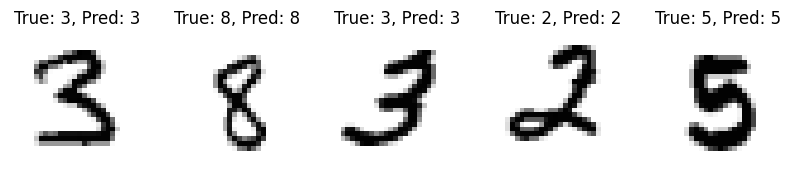

In [13]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples, replace = False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

predictions = model.predict(sample_images)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(1. - sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(sample_labels[i])}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()
